In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

from graphing_function_recent import total_seconds, likelihood_check, dataframe_ranges, convert_time, audio_timing, time_set_zero, convert_data, single_mouse_data, displacement, speed, angle, angle_speed, trajectory, head_angle_trajectory_figure, speed_figure, displacement_figure, head_angle_figure, linearity_ratio, angle_speed_figure, escape_time, filter_data, shelter_rotation

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\V3_Tested2\coords_csv\CoordM2_4122_P2_Hanna_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\Variation3_EscapeBehavior_Hanna_062424\timestamp\M2_4122_P2_Hanna_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\Variation3_EscapeBehavior_Hanna_062424\audio\M2_4122_P2_Hanna_audio.wav'

#input coordinates for the shelter and platform 
north_pixel = 28
south_pixel = 464
east_pixel = 576
west_pixel = 107
shelter_x_pixel = 541
shelter_y_pixel = 244

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 181.968 #stimulus start time
stimulus_end = 189.554 #stimulus end time
escape_done = 184.8 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine1_likelihood,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood
0,0,0,6.595741,-2.585946,0.999956,6.730012,-4.780902,0.999996,5.925825,-4.955890,...,0.999998,7.073971,-7.189411,0.999999,7.189630,-8.500468,1.000000,7.368425,-9.887229,0.999997
1,1,1,6.643475,-2.582509,0.999964,6.747445,-4.773383,0.999997,5.937745,-4.943273,...,0.999998,7.083568,-7.155510,0.999999,7.189630,-8.489041,1.000000,7.368425,-9.887229,0.999998
2,2,2,6.707606,-2.578737,0.999950,6.801518,-4.753089,0.999997,5.987856,-4.920817,...,0.999998,7.083568,-7.150406,0.999999,7.189630,-8.489041,1.000000,7.368425,-9.887229,0.999998
3,3,3,6.755162,-2.578737,0.999958,6.820650,-4.753089,0.999997,6.012922,-4.920817,...,0.999998,7.090050,-7.150406,0.999999,7.189630,-8.489041,1.000000,7.368000,-9.887229,0.999998
4,4,4,6.782351,-2.582509,0.999957,6.826933,-4.767188,0.999998,6.016471,-4.928156,...,0.999998,7.090050,-7.150406,0.999999,7.192774,-8.489041,1.000000,7.358347,-9.887229,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,6299,6299,9.910475,-10.474700,0.999527,8.820669,-11.764663,0.999995,8.208629,-11.225938,...,0.999999,6.924279,-14.093334,0.999999,5.952494,-15.250959,0.999999,4.879233,-16.549985,0.999996
6300,6300,6300,10.476516,-10.328061,0.999730,9.169184,-11.729692,0.999999,8.632845,-11.089173,...,1.000000,7.037477,-13.870231,1.000000,5.952494,-15.067741,0.999999,4.879233,-16.386274,0.999998
6301,6301,6301,11.118052,-10.328061,0.998755,9.861637,-11.289633,0.999998,9.452250,-10.648992,...,0.999996,7.524296,-13.416563,0.999999,6.320336,-14.591452,0.999999,5.012563,-15.922531,0.999999
6302,6302,6302,11.118052,-10.328061,0.999889,9.861637,-11.289633,0.999994,9.452250,-10.648992,...,0.999997,7.524296,-13.416563,0.999999,6.320336,-14.591452,0.999997,5.012563,-15.922531,0.999996


In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

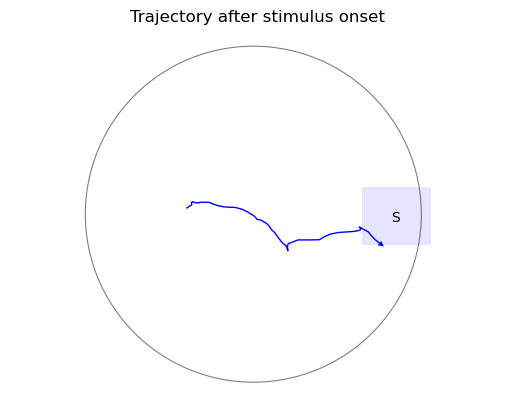

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

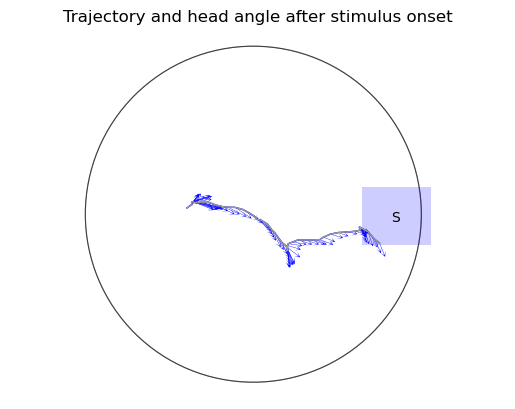

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

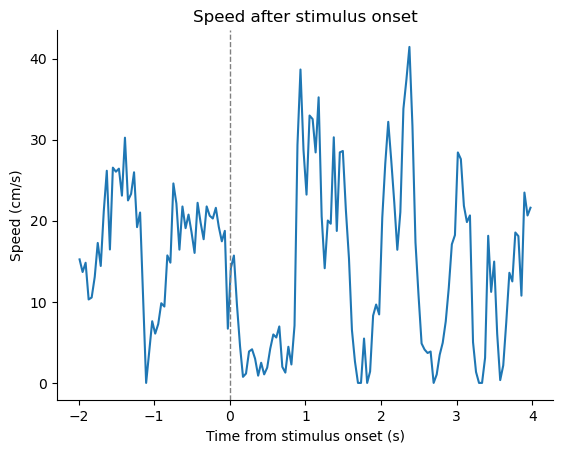

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

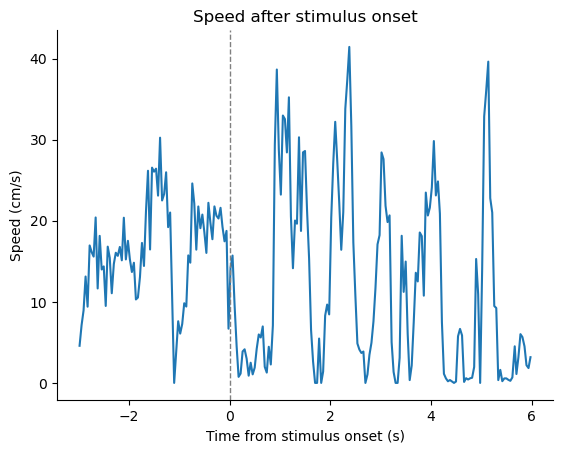

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

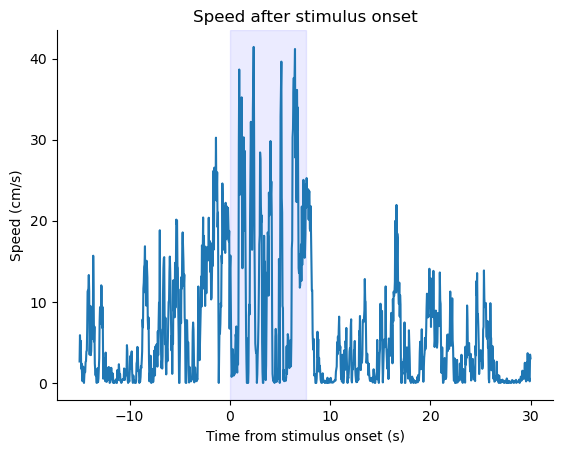

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

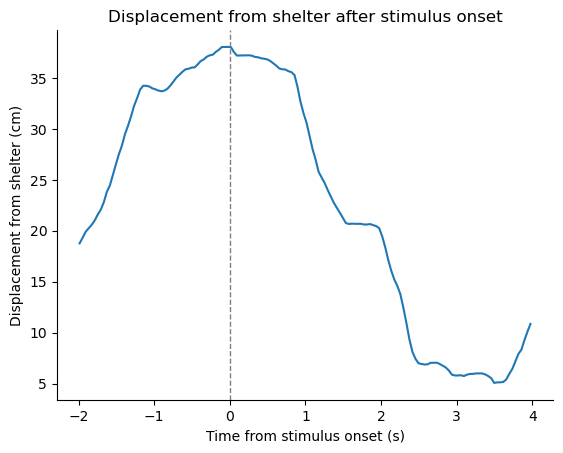

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

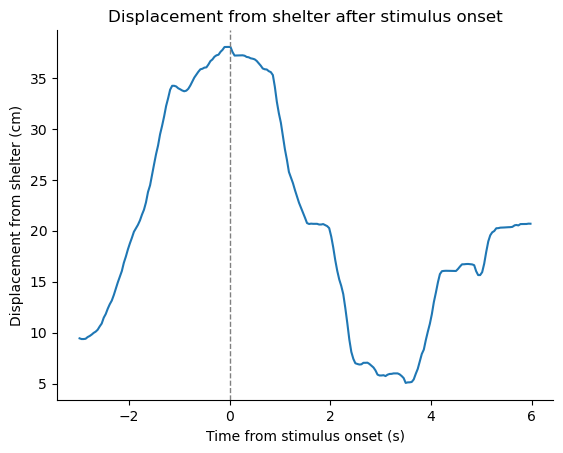

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

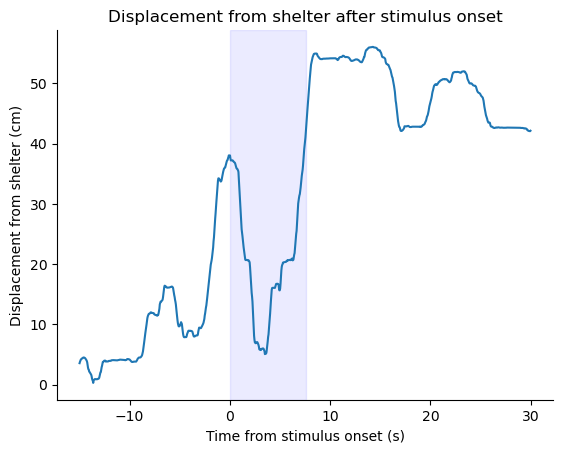

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

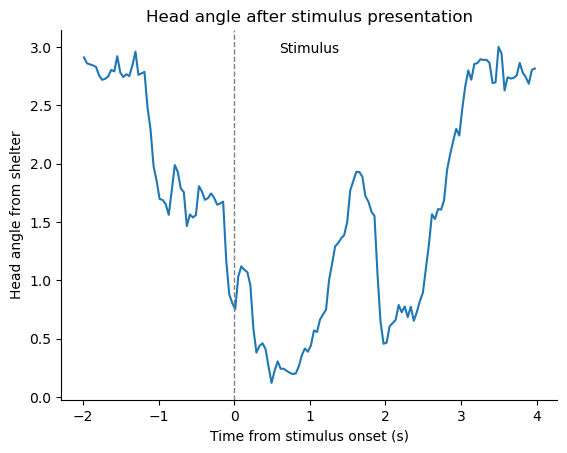

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

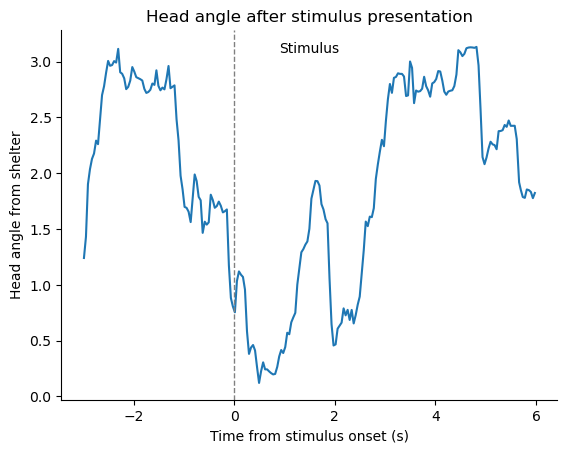

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

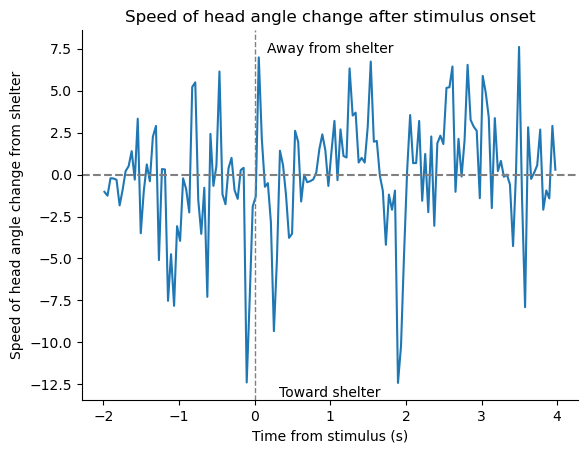

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
shelter_rotation(shelter_x, shelter_y, escape_only)

ValueError: Cannot set a DataFrame with multiple columns to the single column normalized_x

In [ ]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [ ]:
likelihood_data #need to adjust time frame to be useful 